In [55]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv('pistachio.csv')

In [23]:
def test_train_split(data,train_ratio):
    
    ''' 
    Splits the dataset with respect to the test train ratio
    data: dataset to split
    train_ratio: the ratio of train part to the whole dataset 
    returns test set, train set
    '''

    lenght_of_dataset = len(data)
    amount_of_data = int((train_ratio/100)*lenght_of_dataset)

    train_set = []
    test_set = []

    random_index_list = []

    for index in range(amount_of_data):
        while len(random_index_list) <= amount_of_data:
            random_index = random.randrange(lenght_of_dataset)
            if random_index not in random_index_list:
                random_index_list.append(random_index)
            else:
                pass

    for index in range(lenght_of_dataset):
        if index not in random_index_list:
            test_set.append(data.iloc[index])
        else:
            train_set.append(data.iloc[index])

    return pd.DataFrame(test_set), pd.DataFrame(train_set)

In [24]:
test,train = test_train_split(data,80)

In [25]:
test[test.columns[-1]].unique()

array(['Siit_Pistachio', 'Kirmizi_Pistachio'], dtype=object)

In [94]:
def select_future(data = pd.DataFrame): 
    
    ''' 
    This function takes the best feature to choose for optimal gain
    returns the classes and their relevence, the higher is better
    '''

    # its assumed that one column is for results and its the last column
    number_of_features = len(data.columns) - 2

    purity = {}
    

    for index in range(number_of_features):

        Kirmizi_Pistachio = 0
        Siit_Pistachio = 0
        
        Kirmizi_Pistachio_values = 0
        Siit_Pistachio_values = 0

        std_dev = np.std(data[data.columns[index]])

        for inner_index in range(len(data[data.columns[index]])):
            
            # i know that there is 2 possible pistachios in the dataset, so i hard-coded them.
            std_dev = np.std(data[data.columns[inner_index]])
            if data.iloc[inner_index][-1] == 'Kirmizi_Pistachio':
                Kirmizi_Pistachio_values += data.iloc[inner_index][0]
                Kirmizi_Pistachio += 1
            elif data.iloc[inner_index][-1] == 'Siit_Pistachio':
                Siit_Pistachio_values += data.iloc[inner_index][0]
                Siit_Pistachio += 1

        mean_siit = Siit_Pistachio_values/len(data[data.columns[index]])
        mean_kirmizi = Kirmizi_Pistachio_values/len(data[data.columns[index]])

        purity.update({data.columns[index] : abs(Kirmizi_Pistachio/Siit_Pistachio)})


        
    print(std_dev)

        
    return purity

In [95]:
relevence = select_future(train)

TypeError: could not convert string to float: 'Kirmizi_Pistachio'

In [53]:
relevence

{'AREA': 1.3788927335640138,
 'PERIMETER': 1.3788927335640138,
 'MAJOR_AXIS': 1.3788927335640138,
 'MINOR_AXIS': 1.3788927335640138,
 'ECCENTRICITY': 1.3788927335640138,
 'EQDIASQ': 1.3788927335640138,
 'SOLIDITY': 1.3788927335640138,
 'CONVEX_AREA': 1.3788927335640138,
 'EXTENT': 1.3788927335640138,
 'ASPECT_RATIO': 1.3788927335640138,
 'ROUNDNESS': 1.3788927335640138,
 'COMPACTNESS': 1.3788927335640138,
 'SHAPEFACTOR_1': 1.3788927335640138,
 'SHAPEFACTOR_2': 1.3788927335640138,
 'SHAPEFACTOR_3': 1.3788927335640138,
 'SHAPEFACTOR_4': 1.3788927335640138}

In [28]:
min(relevence)

'AREA'

In [89]:
train[train.columns[16]]

0       Kirmizi_Pistachio
1          Siit_Pistachio
2       Kirmizi_Pistachio
3       Kirmizi_Pistachio
4       Kirmizi_Pistachio
              ...        
1712       Siit_Pistachio
1713    Kirmizi_Pistachio
1714    Kirmizi_Pistachio
1715       Siit_Pistachio
1717       Siit_Pistachio
Name: Class, Length: 1375, dtype: object

In [106]:
x = train[train.columns[6]]
y = train[train.columns[-1]]

In [107]:
x

0       0.9424
1       0.9641
2       0.9465
3       0.9437
4       0.9549
         ...  
1712    0.9318
1713    0.8976
1714    0.9340
1715    0.9722
1717    0.9328
Name: SOLIDITY, Length: 1375, dtype: float64

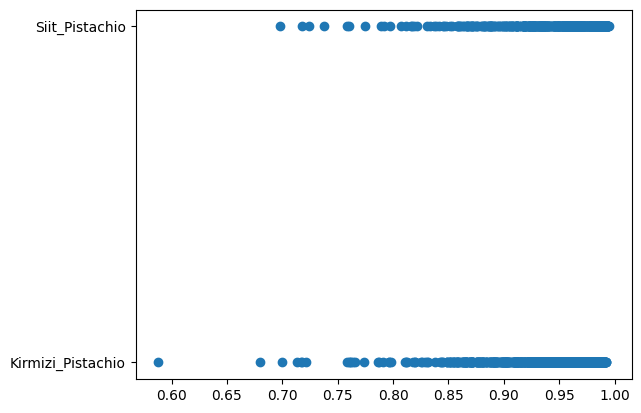

In [108]:
fig, ax = plt.subplots()

ax.scatter(x, y)


plt.show()

In [69]:
22000/1375

16.0

In [102]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def test_train_split(data,train_ratio):
    
    ''' 
    Splits the dataset with respect to the test train ratio
    data: dataset to split
    train_ratio: the ratio of train part to the whole dataset 
    returns test set, train set
    '''

    lenght_of_dataset = len(data)
    amount_of_data = int((train_ratio/100)*lenght_of_dataset)

    train_set = []
    test_set = []

    random_index_list = []

    for index in range(amount_of_data):
        while len(random_index_list) <= amount_of_data:
            random_index = random.randrange(lenght_of_dataset)
            if random_index not in random_index_list:
                random_index_list.append(random_index)
            else:
                pass

    for index in range(lenght_of_dataset):
        if index not in random_index_list:
            test_set.append(data.iloc[index])
        else:
            train_set.append(data.iloc[index])

    return pd.DataFrame(test_set), pd.DataFrame(train_set)

def select_future(data = pd.DataFrame): 
    
    ''' 
    This function takes the best feature to choose for optimal gain
    returns the classes and their relevence, the higher is better
    '''

    # its assumed that one column is for results and its the last column
    number_of_features = len(data.columns) - 1

    purity = {}
    

    for index in range(number_of_features):

        
        Kirmizi_Pistachio = 0
        Siit_Pistachio = 0
        
        Kirmizi_Pistachio_values = 0
        Siit_Pistachio_values = 0

        std_dev = np.std(data[data.columns[index]])

        for inner_index in range(len(data[data.columns[index]])):
            
            # i know that there is 2 possible pistachios in the dataset, so i hard-coded them.
            if data.iloc[inner_index][-1] == 'Kirmizi_Pistachio':
                Kirmizi_Pistachio_values += data.iloc[inner_index][0]
                Kirmizi_Pistachio += 1
            elif data.iloc[inner_index][-1] == 'Siit_Pistachio':
                Siit_Pistachio_values += data.iloc[inner_index][0]
                Siit_Pistachio += 1



        mean_siit = Siit_Pistachio_values/len(data[data.columns[index]])
        mean_kirmizi = Kirmizi_Pistachio_values/len(data[data.columns[index]])

        print('std dev: ' + str(std_dev))
        print('mean siit: ' + str(mean_siit))
        print('mean kirmizi: ' + str(mean_kirmizi))
        print('mean diff : ' + str(abs(mean_kirmizi/mean_siit)))
        


        purity.update({data.columns[index] : abs(Kirmizi_Pistachio/Siit_Pistachio)})

        
        
    

        
    return purity


def main():

    data = pd.read_csv('pistachio.csv')
    test,train = test_train_split(data,80)
    relevence = select_future(train)

if __name__=="__main__":
    main()

std dev: 13125.158704810694
mean siit: 37763.371636363634
mean kirmizi: 42150.59418181818
mean diff : 1.1161766641946225
std dev: 367.5724313289925
mean siit: 37763.371636363634
mean kirmizi: 42150.59418181818
mean diff : 1.1161766641946225
std dev: 31.785373092491497
mean siit: 37763.371636363634
mean kirmizi: 42150.59418181818
mean diff : 1.1161766641946225
std dev: 30.51732988444081
mean siit: 37763.371636363634
mean kirmizi: 42150.59418181818
mean diff : 1.1161766641946225
std dev: 0.04902168047810939
mean siit: 37763.371636363634
mean kirmizi: 42150.59418181818
mean diff : 1.1161766641946225
std dev: 26.907195638725995
mean siit: 37763.371636363634
mean kirmizi: 42150.59418181818
mean diff : 1.1161766641946225
std dev: 0.05038938861378857
mean siit: 37763.371636363634
mean kirmizi: 42150.59418181818
mean diff : 1.1161766641946225
std dev: 13126.144492007443
mean siit: 37763.371636363634
mean kirmizi: 42150.59418181818
mean diff : 1.1161766641946225
std dev: 0.052854759003402606
me